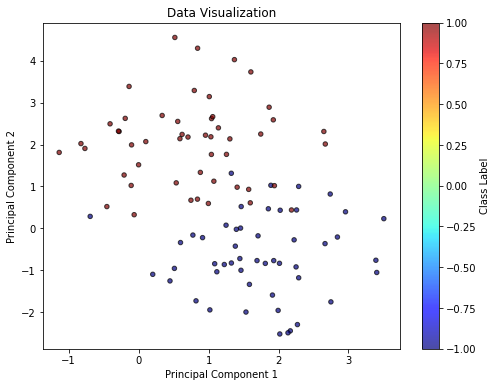

/opt/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:667: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 8 times so far.

  warnings.warn(msg, UserWarning)


[-0.8191789681177732, 2.054376503386347] [-1.1801395691635055, 2.363210268976911]


In [8]:
import numpy as np
# Prepare Data
from dro.src.data.dataloader_regression import regression_basic
from dro.src.data.dataloader_classification import classification_basic
from dro.src.data.draw_utils import draw_classification


from dro.src.linear_model.or_wasserstein_dro import *
from dro.src.linear_model.chi2_dro import *

from dro.src.linear_model.marginal_dro import *

dim = 2
# X = np.array([[-1, -1], [1, 1]])
# y = np.array([-1, 1])
X, y = classification_basic(d = 2, num_samples = 100, radius = 2, visualize = True)

model = MarginalCVaRDRO(input_dim = dim, model_type = 'svm', alpha = 0.2, L = 0.5)
result1 = model.fit(X, y)
result2 = model.fit_old(X, y)

print(result1['theta'], result2['theta'])

In [1]:
from dro.src.linear_model.chi2_dro import Chi2DRO
import numpy as np

data = np.load('data.npz')

X, y = data['X'], 2 * (data['y']) - 1

model = Chi2DRO(input_dim=len(X[0]))
model.update({'eps': 0.5})
model.fit(X, y)

{'theta': [2.982568762658997e-06,
  -1.960251991750727e-07,
  -2.4624271346752922e-06,
  1.2360472774259644e-06,
  2.066391525777745e-06,
  -2.4865358356274887e-06,
  2.176710087984915e-06,
  0.0,
  2.9350978661635084e-06,
  4.339538540151883e-06,
  -3.171517531917443e-06,
  2.5921706668544333e-10,
  -2.6437058037606586e-06,
  -1.0000053799823558,
  -1.0000078856840149,
  -1.0000049264872082,
  -1.0000097047038652,
  -1.0000069249845451,
  0.0,
  -2.1602871456204587e-05,
  0.12718628558675926,
  0.0,
  -4.658811797530515e-06,
  -3.058878649244834e-06,
  0.668613775481772,
  -1.6983275416524654e-06,
  -6.136056793400413e-06,
  2.596976250409225e-07,
  -5.070450861738095e-06,
  3.301683666080837e-06,
  -7.248193422383928e-06,
  0.0,
  -6.678534381062916e-06,
  -4.34199762086103e-06,
  7.771948385555112e-06,
  1.0677361634414439e-06,
  1.467487951451173e-05,
  1.0755918013221602e-05,
  8.894222595258889e-06,
  -1.0484854422687736e-05,
  0.0,
  8.86819312604553e-06,
  0.0,
  -1.10282687893

In [2]:
from dro.src.tree_model.xgb import Chi2DRO_XGB
import numpy as np

data = np.load('data.npz')

X, y = data['X'], 2 * (data['y']) - 1

model = Chi2DRO_XGB(eps = 0.1)
model.update({'eps':0.1, 'num_boost_round': 10})
model.fit(X, y)

/Users/wty6162/Desktop/DRO_solver/dro/dro/src/tree_model/xgb.py:233: RuntimeWarning: overflow encountered in exp
  preds = 1.0 / (1.0 + np.exp(-preds))  # Sigmoid transform
